In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('youth_tobacco_survey_yts_data.csv')

In [3]:
df.head()

,year,locationabbr,locationdesc,topictype,topicdesc,measuredesc,datasource,response,data_value_unit,data_value_type,...,geolocation,topictypeid,topicid,measureid,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,displayorder
0,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,1GEN,8AGE,6RAC,1EDU,YTS01,1
1,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,2GEN,8AGE,6RAC,1EDU,YTS02,2
2,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Percent of Current Smokers Who Want to Quit,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,170CES,3GEN,8AGE,6RAC,1EDU,YTS03,3
3,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,1GEN,8AGE,6RAC,1EDU,YTS04,4
4,2015,AZ,Arizona,Tobacco Use – Survey Data,Cessation (Youth),Quit Attempt in Past Year Among Current Cigare...,YTS,NaN,%,Percentage,...,POINT(-111.76381127699972 34.865970280000454),BEH,105BEH,169QUA,2GEN,8AGE,6RAC,1EDU,YTS05,5


In [4]:
df.tail()

,year,locationabbr,locationdesc,topictype,topicdesc,measuredesc,datasource,response,data_value_unit,data_value_type,...,geolocation,topictypeid,topicid,measureid,stratificationid1,stratificationid2,stratificationid3,stratificationid4,submeasureid,displayorder
9789,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,1GEN,8AGE,6RAC,1EDU,YTS12,12
9790,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,2GEN,8AGE,6RAC,2EDU,YTS12,12
9791,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,2GEN,8AGE,6RAC,1EDU,YTS12,12
9792,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,3GEN,8AGE,6RAC,1EDU,YTS12,12
9793,1999,TN,Tennessee,Tobacco Use – Survey Data,Smokeless Tobacco Use (Youth),User Status,YTS,Frequent,%,Percentage,...,POINT(-85.77449091399967 35.68094058000048),BEH,151BEH,169USS,3GEN,8AGE,6RAC,2EDU,YTS12,12


In [5]:
df.shape

(9794, 31)

In [6]:
df.columns

Index(['year', 'locationabbr', 'locationdesc', 'topictype', 'topicdesc',
       'measuredesc', 'datasource', 'response', 'data_value_unit',
       'data_value_type', 'data_value', 'data_value_footnote_symbol',
       'data_value_footnote', 'data_value_std_err', 'low_confidence_limit',
       'high_confidence_limit', 'sample_size', 'gender', 'race', 'age',
       'education', 'geolocation', 'topictypeid', 'topicid', 'measureid',
       'stratificationid1', 'stratificationid2', 'stratificationid3',
       'stratificationid4', 'submeasureid', 'displayorder'],
      dtype='object')

Data Preprocessing

In [7]:
df.isnull().sum()

year                             0
locationabbr                     0
locationdesc                     0
topictype                        0
topicdesc                        0
measuredesc                      0
datasource                       0
response                      2246
data_value_unit                  0
data_value_type                  0
data_value                     425
data_value_footnote_symbol    9369
data_value_footnote           9369
data_value_std_err             425
low_confidence_limit           425
high_confidence_limit          425
sample_size                    425
gender                           0
race                             0
age                              0
education                        0
geolocation                      4
topictypeid                      0
topicid                          0
measureid                        0
stratificationid1                0
stratificationid2                0
stratificationid3                0
stratificationid4   

In [8]:
# Drop columns with high missing values that are not relevant
df.drop(['data_value_footnote_symbol', 'data_value_footnote'], axis=1, inplace=True)


In [9]:
df.shape

(9794, 29)

In [10]:
# Drop rows where 'response' (our target variable) is missing
# Because the KNN algorithm requires complete data for both features and target labels

df.dropna(subset=['response'], inplace=True)

In [11]:
df.isnull().sum()

year                     0
locationabbr             0
locationdesc             0
topictype                0
topicdesc                0
measuredesc              0
datasource               0
response                 0
data_value_unit          0
data_value_type          0
data_value               0
data_value_std_err       0
low_confidence_limit     0
high_confidence_limit    0
sample_size              0
gender                   0
race                     0
age                      0
education                0
geolocation              0
topictypeid              0
topicid                  0
measureid                0
stratificationid1        0
stratificationid2        0
stratificationid3        0
stratificationid4        0
submeasureid             0
displayorder             0
dtype: int64

In [12]:
df.shape

(7548, 29)

In [13]:
df.dtypes

year                       int64
locationabbr              object
locationdesc              object
topictype                 object
topicdesc                 object
measuredesc               object
datasource                object
response                  object
data_value_unit           object
data_value_type           object
data_value               float64
data_value_std_err       float64
low_confidence_limit     float64
high_confidence_limit    float64
sample_size              float64
gender                    object
race                      object
age                       object
education                 object
geolocation               object
topictypeid               object
topicid                   object
measureid                 object
stratificationid1         object
stratificationid2         object
stratificationid3         object
stratificationid4         object
submeasureid              object
displayorder               int64
dtype: object

In [14]:
df.describe()

,year,data_value,data_value_std_err,low_confidence_limit,high_confidence_limit,sample_size,displayorder
count,7548.000000,7548.000000,7548.000000,7548.000000,7548.000000,7548.000000,7548.000000
mean,2006.294118,13.113023,1.196887,10.779624,15.454875,1803.007684,9.496423
std,4.881029,15.153058,0.846054,13.985767,16.400201,2415.191988,1.707779
min,1999.000000,0.000000,0.000000,0.000000,0.000000,192.000000,7.000000
25%,2002.000000,2.300000,0.500000,1.200000,3.300000,820.000000,8.000000
50%,2006.000000,7.600000,1.000000,5.400000,9.800000,1198.000000,9.000000
75%,2010.000000,18.100000,1.700000,14.600000,21.700000,1858.000000,11.000000
max,2015.000000,98.000000,5.700000,97.600000,98.400000,36910.000000,12.000000


In [15]:
df['locationdesc'].unique()
np.unique(df['locationdesc'].unique()).size

49

In [16]:
df['gender'].unique()

array(['Overall', 'Male', 'Female'], dtype=object)

In [17]:
np.unique(df['data_value'].unique()).size

664

In [18]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables (gender, locationabbr, response)
le_gender = LabelEncoder()
df['gender'] = le_gender.fit_transform(df['gender'])

le_location = LabelEncoder()
df['locationabbr'] = le_location.fit_transform(df['locationabbr'])

In [19]:
df.dtypes

year                       int64
locationabbr               int32
locationdesc              object
topictype                 object
topicdesc                 object
measuredesc               object
datasource                object
response                  object
data_value_unit           object
data_value_type           object
data_value               float64
data_value_std_err       float64
low_confidence_limit     float64
high_confidence_limit    float64
sample_size              float64
gender                     int32
race                      object
age                       object
education                 object
geolocation               object
topictypeid               object
topicid                   object
measureid                 object
stratificationid1         object
stratificationid2         object
stratificationid3         object
stratificationid4         object
submeasureid              object
displayorder               int64
dtype: object

In [20]:
df['response'].unique()

array(['Current', 'Ever', 'Frequent'], dtype=object)

In [21]:
df['response']=df['response'].map({'Ever':0,'Frequent':1})

In [22]:
df.dtypes

year                       int64
locationabbr               int32
locationdesc              object
topictype                 object
topicdesc                 object
measuredesc               object
datasource                object
response                 float64
data_value_unit           object
data_value_type           object
data_value               float64
data_value_std_err       float64
low_confidence_limit     float64
high_confidence_limit    float64
sample_size              float64
gender                     int32
race                      object
age                       object
education                 object
geolocation               object
topictypeid               object
topicid                   object
measureid                 object
stratificationid1         object
stratificationid2         object
stratificationid3         object
stratificationid4         object
submeasureid              object
displayorder               int64
dtype: object

In [23]:
X = df[['gender', 'locationabbr', 'data_value']]
y = df['response']

In [24]:
# Check if there are still any missing values
print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum().sum())

Missing values in X: 0
Missing values in y: 2514


In [25]:
# Drop rows with missing values in 'response'
df = df.dropna(subset=['response'])

# Redefine X and y after dropping missing values
X = df[['gender', 'locationabbr', 'data_value']]
y = df['response']

# Check missing values again
print("Missing values in X:")
print(X.isnull().sum())

print("Missing values in y:")
print(y.isnull().sum())


Missing values in X:
gender          0
locationabbr    0
data_value      0
dtype: int64
Missing values in y:
0


In [26]:
X

,gender,locationabbr,data_value
9,2,2,12.5
10,1,2,12.9
11,0,2,12.2
12,2,2,0.5
13,1,2,0.8
...,...,...,...
9789,2,40,1.1
9790,1,40,7.7
9791,1,40,1.9
9792,0,40,0.2


In [27]:
y

9       0.0
10      0.0
11      0.0
12      1.0
13      1.0
       ... 
9789    1.0
9790    1.0
9791    1.0
9792    1.0
9793    1.0
Name: response, Length: 5034, dtype: float64

In [28]:
df0 = df[:200]
df1 = df[200:400]
df2 = df[400:]

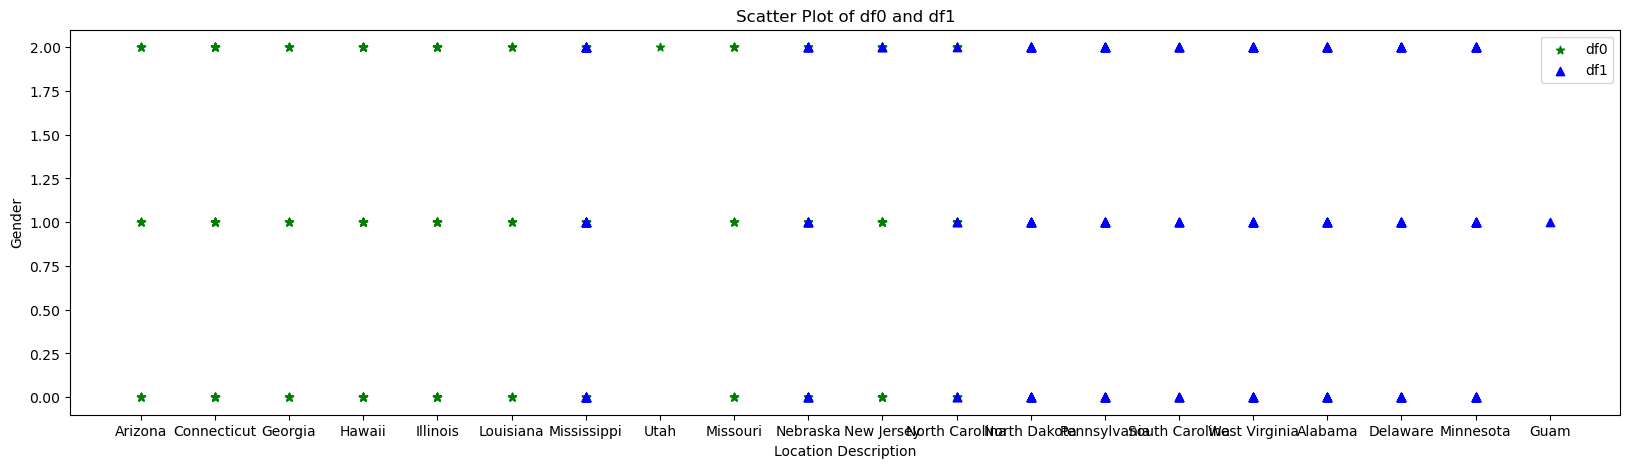

In [29]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 5))

# Scatter plot for df0 with color green
plt.scatter(df0['locationdesc'], df0['gender'], color='green', marker='*', label='df0')

# Scatter plot for df1 with color blue
plt.scatter(df1['locationdesc'], df1['gender'], color='blue', marker='^', label='df1')

# Adding labels and titles
plt.xlabel('Location Description')
plt.ylabel('Gender')
plt.title('Scatter Plot of df0 and df1')
plt.legend()

# Show the plot
plt.show()


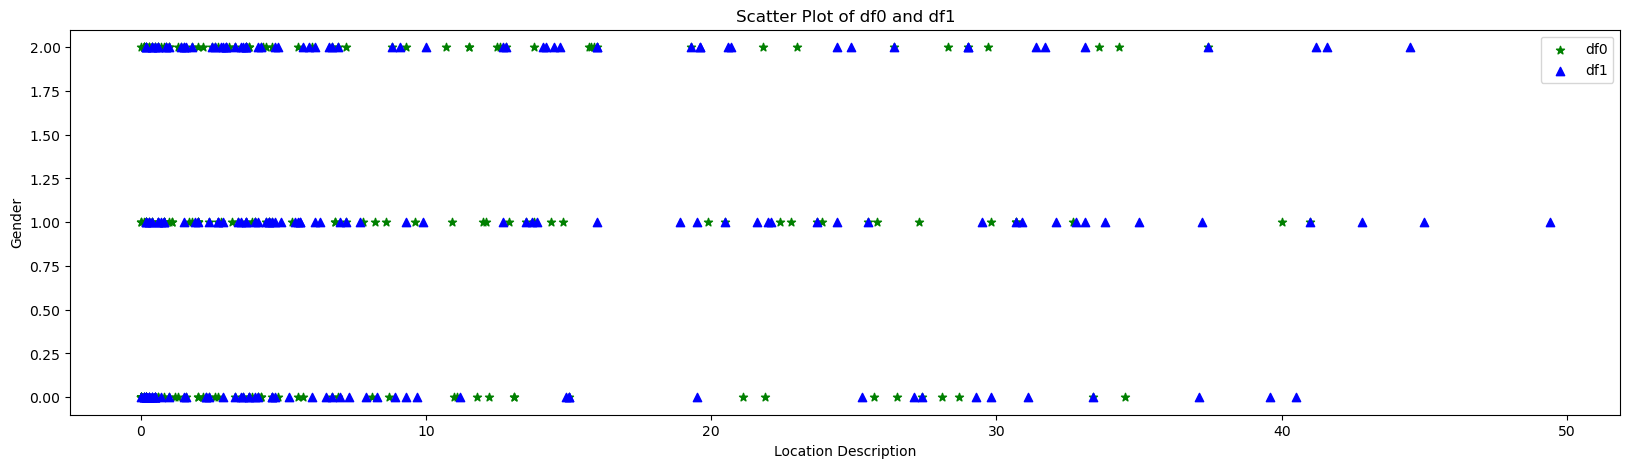

In [30]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(20, 5))

# Scatter plot for df0 with color green
plt.scatter(df0['data_value'], df0['gender'], color='green', marker='*', label='df0')

# Scatter plot for df1 with color blue
plt.scatter(df1['data_value'], df1['gender'], color='blue', marker='^', label='df1')

# Adding labels and titles
plt.xlabel('Location Description')
plt.ylabel('Gender')
plt.title('Scatter Plot of df0 and df1')
plt.legend()

# Show the plot
plt.show()


In [31]:
from sklearn.model_selection import train_test_split



# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check for missing values in train and test sets
print("Missing values in X_train:")
print(X_train.isnull().sum())  # Check missing values in training features

print("Missing values in X_test:")
print(X_test.isnull().sum())  # Check missing values in testing features

print("Missing values in y_train:")
print(y_train.isnull().sum())  # Check missing values in training target

print("Missing values in y_test:")
print(y_test.isnull().sum())  # Check missing values in testing target


Missing values in X_train:
gender          0
locationabbr    0
data_value      0
dtype: int64
Missing values in X_test:
gender          0
locationabbr    0
data_value      0
dtype: int64
Missing values in y_train:
0
Missing values in y_test:
0


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [76]:
# Predict on the test data
y_pred = knn.predict(X_test)

In [77]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.07%


In [74]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.78      0.85       504
         1.0       0.81      0.94      0.87       503

    accuracy                           0.86      1007
   macro avg       0.87      0.86      0.86      1007
weighted avg       0.87      0.86      0.86      1007



In [62]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[462  42]
 [ 64 439]]
